In [11]:
import pandas as pd 

df = pd.read_csv("SAheart.csv",delimiter= ";")
df = pd.get_dummies(df,columns=["chd","famhist"])
df

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd_No,chd_Si,famhist_Absent,famhist_Present
0,160,12.00,5.73,23.11,49,25.30,97.20,52,0,1,0,1
1,144,0.01,4.41,28.61,55,28.87,2.06,63,0,1,1,0
2,118,0.08,3.48,32.28,52,29.14,3.81,46,1,0,0,1
3,170,7.50,6.41,38.03,51,31.99,24.26,58,0,1,0,1
4,134,13.60,3.50,27.78,60,25.99,57.34,49,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,64,28.45,0.00,58,1,0,1,0
458,182,4.20,4.41,32.10,52,28.61,18.72,52,0,1,1,0
459,108,3.00,1.59,15.23,40,20.09,26.64,55,1,0,1,0
460,118,5.40,11.61,30.79,64,27.35,23.97,40,1,0,1,0


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [7]:
from sklearn.decomposition import PCA
pca = PCA()
C = pca.fit_transform(df_scaled)

In [8]:
import numpy as np
inertia = pca.explained_variance_ratio_
V = pca.transform(np.identity(df_scaled.shape[1]))

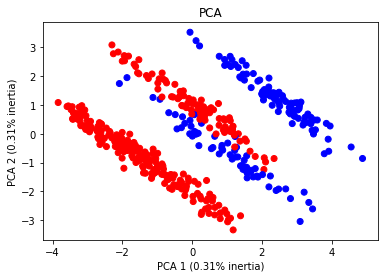

In [12]:
import matplotlib.pyplot as plt
plt.scatter(np.ravel(C[:,0]),np.ravel(C[:,1]),c = ['b' if i==1 else 'r' for i in df["chd_Si"]])
plt.xlabel('PCA 1 (%.2f%% inertia)' % (inertia[0],))
plt.ylabel('PCA 2 (%.2f%% inertia)' % (inertia[0],))
plt.title('PCA')
plt.show()

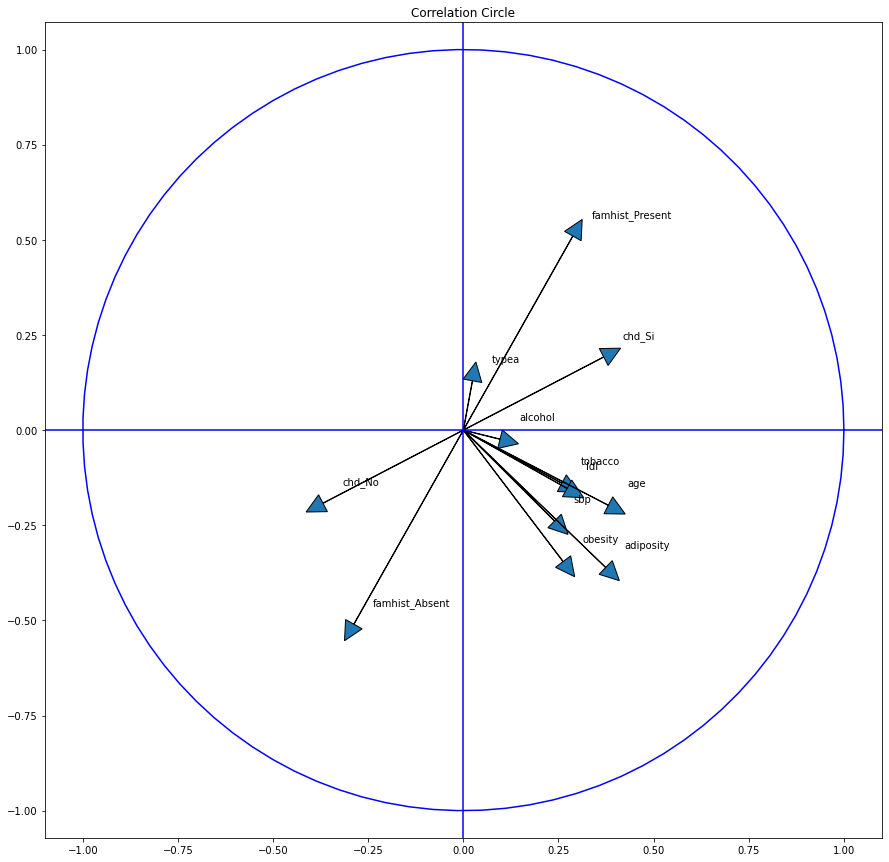

In [16]:
# plt.figure(figsize=(15,15))
# plt.axhline(0, color='b')
# plt.axvline(0, color='b')
# for i in range(0, df.shape[1]):
# plt.arrow(0,0, col_corr[i, 0], # x - PC1
#  col_corr[i, 1], # y - PC2
#  head_width=0.05, head_length=0.05)
# plt.text(col_corr[i, 0] + 0.05, col_corr[i, 1] + 0.05, df.columns.values[i])
# an = np.linspace(0, 2 * np.pi, 100)
# plt.plot(np.cos(an), np.sin(an),color="b") # Circle
# plt.axis('equal')
# plt.title('Correlation Circle')
# plt.show()

plt.figure(figsize=(15,15))
plt.axhline(0, color='b')
plt.axvline(0, color='b')
for i in range(0, df.shape[1]):
    plt.arrow(0,0, V[i, 0], # x - PC1
        V[i, 1], # y - PC2
        head_width=0.05, head_length=0.05)
    plt.text(V[i, 0] + 0.05, V[i, 1] + 0.05, df.columns.values[i])
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an),color="b") # Circle
plt.axis('equal')
plt.title('Correlation Circle')
plt.show()